<a href="https://colab.research.google.com/github/UEPP40/PUM/blob/golon/k_means_i_dendogram.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [32]:
import pandas as pd

# Wczytanie pliku CSV
df = pd.read_csv('countries.csv')

# Wyświetlenie pierwszych kilku wierszy, aby upewnić się, że wczytano poprawnie
print(df.head())

           Country                               Region  Population  \
0     Afghanistan         ASIA (EX. NEAR EAST)             31056997   
1         Albania   EASTERN EUROPE                          3581655   
2         Algeria   NORTHERN AFRICA                        32930091   
3  American Samoa   OCEANIA                                   57794   
4         Andorra   WESTERN EUROPE                            71201   

   Area (sq. mi.) Pop. Density (per sq. mi.) Coastline (coast/area ratio)  \
0          647500                       48,0                         0,00   
1           28748                      124,6                         1,26   
2         2381740                       13,8                         0,04   
3             199                      290,4                        58,29   
4             468                      152,1                         0,00   

  Net migration Infant mortality (per 1000 births)  GDP ($ per capita)  \
0         23,06                     

In [33]:
# Usunięcie niepotrzebnych kolumn
df_cleaned = df.drop(columns=['Country','Region'])

# Przekształcenie danych numerycznych
df_cleaned.replace(',', '.', regex=True, inplace=True)
df_cleaned = df_cleaned.apply(pd.to_numeric, errors='coerce')

# Obsługa brakujących danych (tu używam uzupełnienia średnią)
df_cleaned.fillna(df_cleaned.mean(), inplace=True)

# Normalizacja danych
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_cleaned)

# Sprawdzenie wyniku
print(df_scaled)

[[ 0.01969468  0.02758332 -0.19984434 ...  1.61913212 -0.32114937
  -1.15881848]
 [-0.21387688 -0.31879748 -0.15360296 ...  0.57341694 -0.71214481
   0.08579033]
 [ 0.03561811  0.99842051 -0.22048996 ... -0.35218232  2.38574214
  -1.67167236]
 ...
 [-0.06192308 -0.03933023 -0.20431152 ... -0.11195045  1.42329182
  -1.07751238]
 [-0.14654488  0.08642673 -0.21958445 ...  0.48862922  0.05480778
  -0.47709808]
 [-0.14029829 -0.11624192 -0.20992568 ...  0.19893785 -0.29859194
   0.08579033]]


In [34]:
# Sprawdzenie, czy którykolwiek wiersz zawiera wartość NaN
nan_check = df_cleaned.isnull().any()

# Wyświetlenie kolumn zawierających wartości NaN
print("Kolumny zawierające wartości NaN:")
print(nan_check[nan_check == True])

Kolumny zawierające wartości NaN:
Series([], dtype: bool)


In [35]:
from sklearn.cluster import KMeans

# Inicjalizacja modelu k-means z 3 klastrami
kmeans = KMeans(n_clusters=3, random_state=42)

# Dopasowanie modelu do danych
kmeans.fit(df_scaled)

# Przypisanie klastrów do danych
df_cleaned['Cluster'] = kmeans.labels_

# # Wczytanie danych z nazwami krajów
# df_countries = pd.read_csv('countries.csv')

# # Dodanie kolumny z nazwami krajów do wyników
# df_cleaned['Country'] = df_countries['Country']

# Wyświetlenie wyników z nazwami krajów
print(df_cleaned[['Cluster']])



     Cluster
0          0
1          2
2          2
3          2
4          1
..       ...
222        2
223        2
224        0
225        0
226        0

[227 rows x 1 columns]


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


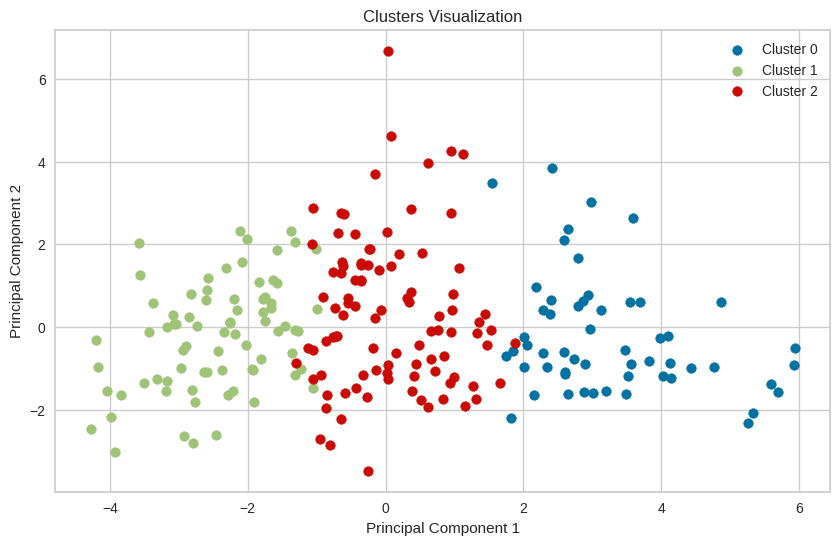

In [36]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Redukcja wymiarów do 2 za pomocą PCA
pca = PCA(n_components=2)
df_pca = pca.fit_transform(df_scaled)

# Dodanie kolumny z klastrami
df_pca = pd.DataFrame(df_pca, columns=['PC1', 'PC2'])
df_pca['Cluster'] = kmeans.labels_

# Wykres
plt.figure(figsize=(10, 6))
for cluster in range(3):
    plt.scatter(df_pca[df_pca['Cluster'] == cluster]['PC1'],
                df_pca[df_pca['Cluster'] == cluster]['PC2'],
                label=f'Cluster {cluster}')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Clusters Visualization')
plt.legend()
plt.grid(True)
plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

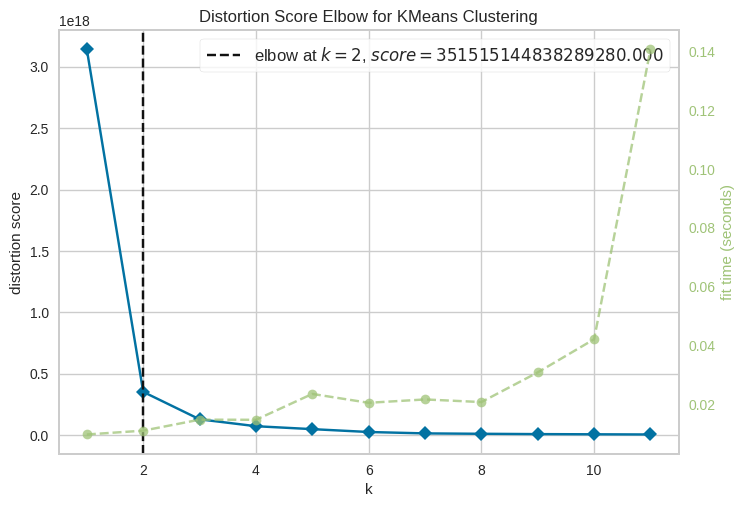

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [38]:
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
from yellowbrick.cluster import KElbowVisualizer
# Generate synthetic dataset with 8 random clusters
X, y = make_blobs(n_samples=1000, n_features=12, centers=8,
random_state=42)
# Instantiate the clustering model and visualizer
model = KMeans()
visualizer = KElbowVisualizer(model, k=(1,12))
visualizer.fit(df_cleaned)
# Fit the data to the
visualizer.show()
# Finalize and render the figure

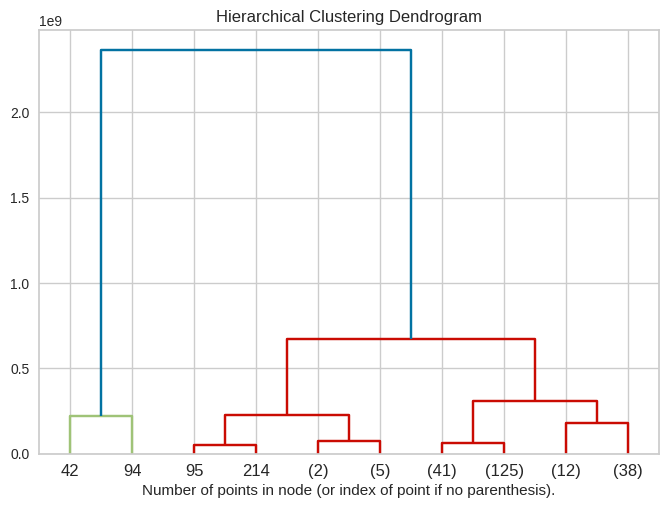

In [41]:
import numpy as np
from matplotlib import pyplot as plt
from scipy.cluster.hierarchy import dendrogram

from sklearn.cluster import AgglomerativeClustering
from sklearn.datasets import load_iris


def plot_dendrogram(model, **kwargs):
    # Create linkage matrix and then plot the dendrogram

    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack(
        [model.children_, model.distances_, counts]
    ).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)

X = df_cleaned

# setting distance_threshold=0 ensures we compute the full tree.
model = AgglomerativeClustering(distance_threshold=0, n_clusters=None)

model = model.fit(X)
plt.title("Hierarchical Clustering Dendrogram")
# plot the top three levels of the dendrogram
plot_dendrogram(model, truncate_mode="level", p=3)
plt.xlabel("Number of points in node (or index of point if no parenthesis).")
plt.show()